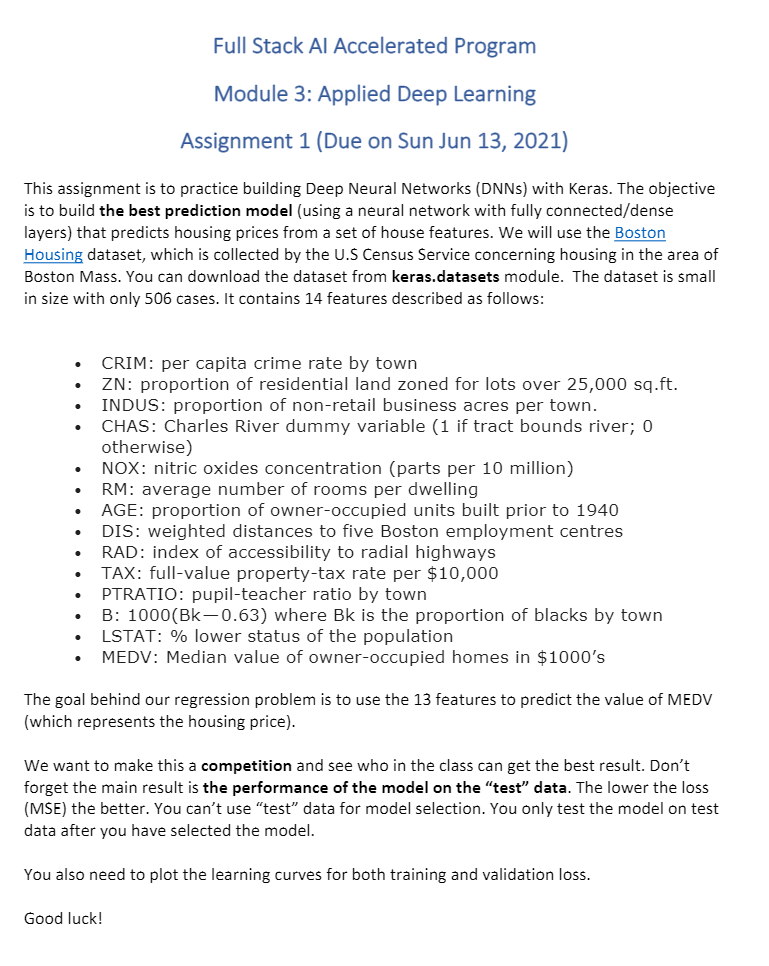

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

!pip install keras-tuner
import kerastuner as kt

np.random.seed(113)
tf.random.set_seed(113)

In [ ]:
bst_housing = keras.datasets.boston_housing
(X_train_full, y_train_full), (X_test, y_test) = bst_housing.load_data(seed=113)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=113)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
temp_lst = [X_train_full, y_train_full, X_test, y_test, X_train, X_valid, y_train, y_valid]
for item in temp_lst:
  print(item.shape)

(404, 13)
(404,)
(102, 13)
(102,)
(303, 13)
(101, 13)
(303,)
(101,)


**1 hidden Layer with 13 Neurons using relu as the activation. This will be used to set the baseline**

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(13, 
                       kernel_initializer='lecun_normal', 
                       activation="selu", 
                       input_shape=[13]),
    keras.layers.Dense(1)  
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="mean_squared_error", 
              #optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              #optimizer='nadam',
              optimizer='rmsprop',
              metrics=['mae']
              )
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    validation_data=(X_valid, y_valid)
                    )

Epoch 1/20
10/10 [==============================] - 1s 20ms/step - loss: 593.8625 - mae: 22.1857 - val_loss: 635.4810 - val_mae: 22.6844
Epoch 2/20
10/10 [==============================] - 0s 6ms/step - loss: 587.7569 - mae: 22.1283 - val_loss: 627.9606 - val_mae: 22.5955
Epoch 3/20
10/10 [==============================] - 0s 8ms/step - loss: 580.7982 - mae: 22.0553 - val_loss: 620.4970 - val_mae: 22.5030
Epoch 4/20
10/10 [==============================] - 0s 6ms/step - loss: 573.8522 - mae: 21.9713 - val_loss: 613.0111 - val_mae: 22.4066
Epoch 5/20
10/10 [==============================] - 0s 6ms/step - loss: 567.0339 - mae: 21.8942 - val_loss: 605.6073 - val_mae: 22.3083
Epoch 6/20
10/10 [==============================] - 0s 6ms/step - loss: 560.3148 - mae: 21.8204 - val_loss: 598.1245 - val_mae: 22.2055
Epoch 7/20
10/10 [==============================] - 0s 6ms/step - loss: 553.4218 - mae: 21.7368 - val_loss: 590.6504 - val_mae: 22.0988
Epoch 8/20
10/10 [=============================

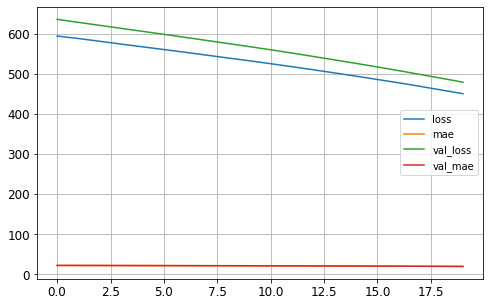

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

4/4 [==============================] - 0s 3ms/step - loss: 481.5931 - mae: 20.5237


**Testing with RMSprop as the optimizer**

In [ ]:
model.compile(loss="mean_squared_error", optimizer='rmsprop', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
10/10 [==============================] - 1s 22ms/step - loss: 437.6137 - mae: 19.6971 - val_loss: 463.9759 - val_mae: 19.6510
Epoch 2/20
10/10 [==============================] - 0s 5ms/step - loss: 426.7261 - mae: 19.4553 - val_loss: 453.8398 - val_mae: 19.4095
Epoch 3/20
10/10 [==============================] - 0s 6ms/step - loss: 417.5499 - mae: 19.2471 - val_loss: 445.0979 - val_mae: 19.1948
Epoch 4/20
10/10 [==============================] - 0s 5ms/step - loss: 408.9906 - mae: 19.0432 - val_loss: 436.1098 - val_mae: 18.9673
Epoch 5/20
10/10 [==============================] - 0s 5ms/step - loss: 400.3843 - mae: 18.8332 - val_loss: 427.1552 - val_mae: 18.7405
Epoch 6/20
10/10 [==============================] - 0s 5ms/step - loss: 391.9074 - mae: 18.6255 - val_loss: 418.2944 - val_mae: 18.5081
Epoch 7/20
10/10 [==============================] - 0s 5ms/step - loss: 383.1772 - mae: 18.4063 - val_loss: 409.2889 - val_mae: 18.2697
Epoch 8/20
10/10 [=============================

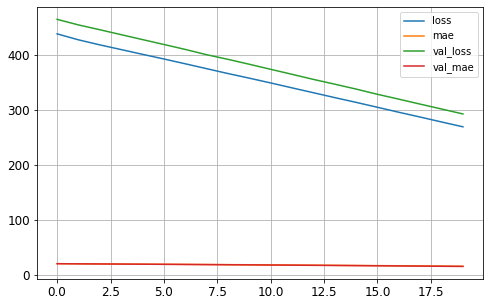

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

4/4 [==============================] - 0s 3ms/step - loss: 287.9194 - mae: 15.4152


**Trying a deeper configuration with 2 hidden Layer with 13, and 6 Neurons using ELU as the activation. runing for 100 Epoch with early stopping**

In [ ]:
keras.backend.clear_session()
np.random.seed(113)
tf.random.set_seed(113)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(13, kernel_initializer='lecun_normal', activation="selu", input_shape=[13]),
    keras.layers.Dense(6, kernel_initializer='lecun_normal', activation="selu"),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", 
              #optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              optimizer='nadam',
              metrics=['mae']
              )
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", 
                                                save_best_only=True
                                                )
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True
                                                  )
history = model.fit(X_train, 
                    y_train, 
                    epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb]
                    )

mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
10/10 [==============================] - 1s 21ms/step - loss: 554.5195 - mae: 22.0953 - val_loss: 592.6121 - val_mae: 22.4226
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 547.8702 - mae: 21.9837 - val_loss: 584.5446 - val_mae: 22.2779
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 540.1497 - mae: 21.8478 - val_loss: 576.3791 - val_mae: 22.1249
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 532.2374 - mae: 21.6988 - val_loss: 567.9616 - val_mae: 21.9624
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 524.1615 - mae: 21.5461 - val_loss: 559.3451 - val_mae: 21.7920
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 515.9427 - mae: 21.3877 - val_loss: 550.4427 - val_mae: 21.6105
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 507.2716 - mae: 21.2145 - val_loss: 541.2281 - val_mae: 21.4160
Epoch 8/100
10/10 [=====================

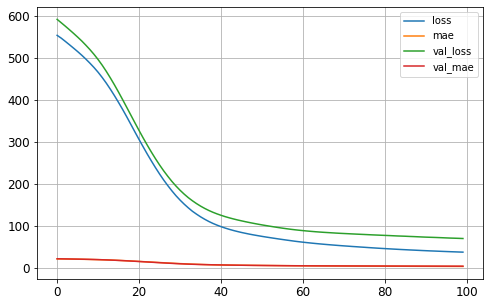

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

4/4 [==============================] - 0s 5ms/step - loss: 46.7360 - mae: 5.0016


In [ ]:
keras.backend.clear_session()
np.random.seed(113)
tf.random.set_seed(113)

**trying wider configuration with 2 hidden Layer with 26, and 13 Neurons using ELU as the activation.**

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(26, activation="ELU", input_shape=[13]),
    keras.layers.Dense(13, activation="ELU"),
    #keras.layers.Dense(6, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              #optimizer='rmsprop',
              metrics=['mae']
              )
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", 
                                                save_best_only=True
                                                )
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True
                                                  )
history = model.fit(X_train, 
                    y_train, 
                    epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb]
                    )

mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
10/10 [==============================] - 1s 20ms/step - loss: 529.9805 - mae: 21.5704 - val_loss: 519.3787 - val_mae: 20.8670
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 397.5237 - mae: 18.5606 - val_loss: 286.8558 - val_mae: 14.4997
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 173.0769 - mae: 10.9988 - val_loss: 139.6343 - val_mae: 8.3512
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 79.7801 - mae: 6.7849 - val_loss: 77.1637 - val_mae: 5.4507
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 40.5855 - mae: 4.5017 - val_loss: 55.5162 - val_mae: 4.4753
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 30.9429 - mae: 3.8449 - val_loss: 49.4777 - val_mae: 4.2488
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 27.1959 - mae: 3.6186 - val_loss: 45.2276 - val_mae: 3.9953
Epoch 8/100
10/10 [==============================] - 0s 5

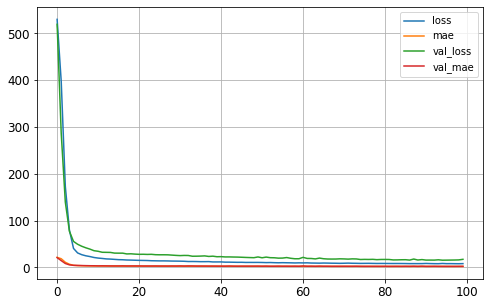

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

4/4 [==============================] - 0s 4ms/step - loss: 16.6630 - mae: 2.6263
